This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**


######이 코드는 MNIST 데이터셋에 대해 두 개의 새로운 특성을 만드는 방법을 보여줍니다.

첫 번째 방법은 train_images에 784개의 새로운 무작위 채널을 추가하여 train_images_with_noise_channels를 만드는 것입니다. 이렇게 하면 각 이미지에 대해 임의의 잡음이 추가되어 입력 데이터에 더 많은 변동성을 추가합니다.

두 번째 방법은 train_images에 784개의 모든 채널에 0을 추가하여 train_images_with_zeros_channels를 만드는 것입니다. 이렇게 하면 입력 데이터에 대해 추가적인 정보가 없이 훈련 데이터가 더 많은 차원을 가지게 됩니다.

두 방법 모두 모델을 훈련시키는 데 사용할 수 있습니다. 첫 번째 방법은 모델이 잡음이 포함된 이미지에 대해 일반화되도록 훈련시킬 수 있으며, 두 번째 방법은 모델이 더 많은 특성을 다룰 수 있도록 하여 일반화 능력을 향상시킬 수 있습니다.

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

# 위 코드는 MNIST 데이터셋을 불러온 후, 각 이미지 데이터를 28 x 28 크기의 2차원 배열에서 784 크기의 1차원 배열로 변환하고, 
# 이를 0~1 사이의 실수 값으로 정규화하는 과정을 거칩니다.

# 그리고 각 이미지 데이터에 무작위 값을 가지는 784개의 노이즈 채널을 추가한 train_images_with_noise_channels와, 
# 784개의 0으로 이루어진 채널을 추가한 train_images_with_zeros_channels를 생성합니다.

# 이렇게 생성된 데이터셋은 노이즈 채널을 포함하거나 제로 패딩을 적용한 입력 데이터셋을 사용하여 모델의 성능을 비교하는 실험 등에서 사용될 수 있습니다.

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


# 이 코드는 MNIST 데이터셋에 대해 노이즈가 추가된 새로운 특성 차원 또는 모든 값이 0인 차원을 추가하여 모델을 훈련시키는 것입니다.

# get_model 함수는 2개의 Dense 층으로 이루어진 Sequential 모델을 정의하고 컴파일합니다. 
# 모델은 relu 활성화 함수를 사용하는 512개의 유닛을 가진 첫 번째 층과 softmax 활성화 함수를 사용하는 10개의 유닛을 가진 두 번째 층으로 이루어져 있습니다.

# 먼저 train_images_with_noise_channels을 사용하여 모델을 훈련시키고, 그 결과를 history_noise에 저장합니다.
# train_images_with_noise_channels은 원래 MNIST 이미지에 무작위 노이즈를 추가하여 생성된 데이터입니다. 
# fit 메서드를 사용하여 모델을 10번의 epoch 동안 훈련하며, 배치 크기는 128입니다. 
# 20%의 데이터를 검증 데이터로 사용하며, 이는 validation_split 매개변수를 사용하여 설정됩니다.

# 그 다음, train_images_with_zeros_channels를 사용하여 모델을 다시 훈련시키고, 그 결과를 history_zeros에 저장합니다. 
# train_images_with_zeros_channels는 원래 MNIST 이미지에 모든 값이 0인 새로운 특성 차원을 추가하여 생성된 데이터입니다. 
# 마찬가지로, 10번의 epoch 동안 모델을 훈련하며, 배치 크기는 128이고, 20%의 데이터를 검증 데이터로 사용합니다.

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6067 - accuracy: 0.8133 - val_loss: 0.3230 - val_accuracy: 0.9040
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2665 - accuracy: 0.9176 - val_loss: 0.1915 - val_accuracy: 0.9438
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1701 - accuracy: 0.9467 - val_loss: 0.1503 - val_accuracy: 0.9563
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9624 - val_loss: 0.1943 - val_accuracy: 0.9405
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0902 - accuracy: 0.9717 - val_loss: 0.1219 - val_accuracy: 0.9634
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.1072 - val_accuracy: 0.9691
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.1167 - val_accuracy: 0.9673
Epoch 

**Plotting a validation accuracy comparison**

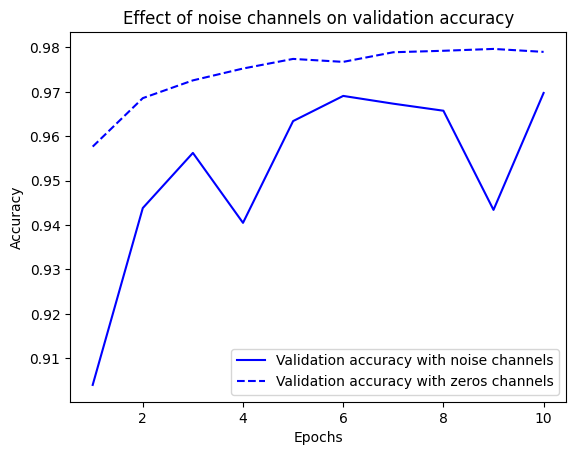

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 이 코드는 두 개의 모델을 학습시켜 검증 데이터에 대한 정확도를 비교한 결과를 시각화하는 코드입니다.

# 먼저 history_noise와 history_zeros는 각각 MNIST 데이터셋에 noise channels와 zeros channels를 추가한 데이터셋으로 
# 모델을 학습시켰을 때의 validation accuracy의 히스토리입니다. 이 히스토리에서 val_accuracy에 해당하는 값을 가져옵니다.

# 다음으로, epochs는 학습시킨 epoch의 범위를 지정합니다. 이 예시에서는 10번의 epoch을 학습시켰으므로 range(1, 11)로 지정합니다.

# plt.plot() 함수를 이용하여 두 모델의 validation accuracy 히스토리를 시각화합니다. 
# val_acc_noise는 파란 실선으로, val_acc_zeros는 파란 점선으로 표시됩니다. 이를 통해 두 모델의 validation accuracy를 비교할 수 있습니다.

# 그리고 나서 plt.title(), plt.xlabel(), plt.ylabel(), plt.legend() 함수를 이용하여 그래프의 제목, x축과 y축 레이블, 범례를 지정합니다.

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**


#####이 코드는 MNIST 데이터셋을 사용하여, 레이블을 무작위로 섞은 상태로 모델을 학습하는 코드입니다.

원래 MNIST 데이터셋에서는 이미지와 그에 해당하는 숫자 레이블이 1:1로 매칭되어 있지만, 이 코드에서는 이미지에 대한 레이블이 완전히 무작위로 섞였습니다. 즉, 학습 데이터셋에서 레이블 0이 달린 이미지가 실제로는 레이블 1, 1이 달린 이미지는 레이블 7 등과 같이, 레이블과 이미지 사이에 정확한 대응 관계가 없습니다.

이렇게 학습 데이터셋에 무작위로 섞인 레이블로 모델을 학습하면, 모델은 잘못된 레이블 정보를 학습하게 됩니다. 이러한 잘못된 정보를 가지고 학습된 모델은 테스트 데이터셋에서 좋은 성능을 발휘할 수 없습니다. 이 코드에서는 이러한 실험을 통해 무작위 레이블에 대한 학습 결과를 비교하고, 올바른 레이블로 학습한 모델과의 차이를 살펴봅니다.

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)


# 이 코드는 MNIST 데이터셋을 사용하여 신경망 모델을 학습시키는 코드입니다.

# 먼저 mnist.load_data() 함수를 사용하여 MNIST 데이터셋을 로드합니다. 로드된 데이터는 (train_images, train_labels) 튜플로 반환되며, 
# 훈련 이미지 데이터와 레이블 데이터를 각각 train_images와 train_labels 변수에 할당합니다.

# 그 다음으로, train_images를 28x28의 2D 배열에서 1D 배열로 변환합니다. 그리고 데이터 타입을 float32로 변경한 후, 255로 나눠 정규화를 수행합니다.

# random_train_labels 변수에는 train_labels를 복사한 후 np.random.shuffle() 함수를 사용하여 레이블을 무작위로 섞습니다. 
# 이를 통해 데이터에 대한 레이블 정보가 완전히 무작위로 변경됩니다.

# 이후, keras.Sequential() 함수를 사용하여 모델을 생성합니다. 이 모델은 두 개의 layers.Dense() 레이어를 갖습니다. 
# 첫 번째 레이어는 512개의 뉴런과 ReLU 활성화 함수를 사용하고, 두 번째 레이어는 10개의 뉴런과 softmax 활성화 함수를 사용합니다.

# 모델은 sparse_categorical_crossentropy 손실 함수와 rmsprop 옵티마이저를 사용하여 컴파일됩니다. 또한, 모델의 성능 측정 지표로 accuracy를 사용합니다.

# 마지막으로, model.fit() 함수를 사용하여 모델을 훈련시킵니다. 이때 train_images와 random_train_labels를 입력으로 사용하며, 
# 훈련 epoch 횟수는 100회이며 배치 크기는 128입니다. 또한, 훈련 데이터의 20%를 검증 데이터로 사용하도록 지정하였습니다.

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3153 - accuracy: 0.1055 - val_loss: 2.3066 - val_accuracy: 0.1018
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2981 - accuracy: 0.1176 - val_loss: 2.3121 - val_accuracy: 0.1006
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2907 - accuracy: 0.1278 - val_loss: 2.3208 - val_accuracy: 0.1063
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2786 - accuracy: 0.1366 - val_loss: 2.3294 - val_accuracy: 0.1014
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2620 - accuracy: 0.1531 - val_loss: 2.3465 - val_accuracy: 0.1048
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2421 - accuracy: 0.1680 - val_loss: 2.3552 - val_accuracy: 0.1038
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2180 - accuracy: 0.1830 - val_loss: 2.3683 - val_accuracy: 0.0967

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

#####이 코드는 MNIST 데이터를 사용하여 모델을 학습하는데, 학습률(learning rate)이 너무 높아서 발생하는 문제를 보여줍니다.

먼저 MNIST 데이터를 불러온 후, 28x28 픽셀 이미지를 784 픽셀의 1D 벡터로 변환합니다. 이후 데이터를 0과 1사이의 값으로 정규화합니다.

그 다음 모델을 정의합니다. 이 모델은 2개의 레이어를 가진 단순한 MLP입니다. 첫 번째 레이어는 512개의 유닛으로 구성되고 활성화 함수로 ReLU를 사용하며, 두 번째 레이어는 10개의 유닛으로 구성되고 활성화 함수로 softmax를 사용합니다. 이 모델은 RMSprop optimizer를 사용하며, 손실 함수는 sparse_categorical_crossentropy를 사용하고, 정확도를 측정합니다.

마지막으로 모델을 학습시킵니다. 학습률이 1.0으로 설정되어 있습니다. 이것은 너무 높은 학습률입니다. 학습률이 높으면 최적점에서의 손실 함수 값으로 수렴하지 않고 발산하는 현상이 발생할 수 있습니다. 이 문제는 학습 과정에서 발생하는데, 훈련 손실 값이 감소하지 않고 발산하는 것을 볼 수 있습니다. 이는 모델이 최적점에서 멀리 떨어져 있다는 것을 의미합니다.

따라서 적절한 학습률을 선택하는 것은 중요합니다. 일반적으로 학습률은 모델 및 데이터에 따라 적절한 값을 선택해야 합니다.

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


# 이 코드는 MNIST 데이터셋을 이용하여 딥러닝 모델을 학습하는 코드입니다. 
# 먼저, 데이터를 로드하고, 전처리 과정을 거쳐서 train_images를 0과 1사이의 값으로 스케일링합니다.

# 모델은 Sequential API를 이용하여 생성되었으며, 입력층으로 512개의 뉴런을 가진 Dense 층과 출력층으로 10개의 뉴런을 가진 Dense 층으로 이루어져 있습니다. 
# 각각의 Dense 층은 ReLU와 softmax 활성화 함수를 사용하였습니다.

# 컴파일 과정에서는 RMSprop 옵티마이저를 사용하며, sparse_categorical_crossentropy 손실 함수와 정확도를 측정하기 위한 메트릭을 지정합니다.

# 모델 학습은 총 10번의 에포크를 수행하며, 배치 크기는 128로 지정되어 있습니다. 또한 학습 데이터 중 20%를 검증 데이터로 사용합니다.

# 이 코드에서 주목할 점은 RMSprop 옵티마이저의 학습률이 1.으로 지정되어 있다는 점입니다. 
# 이는 일반적으로 사용되는 학습률 범위(0.01 ~ 0.0001)를 크게 초과하는 값입니다. 따라서 이 모델은 학습이 실패할 가능성이 높습니다.

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 855.8773 - accuracy: 0.3513 - val_loss: 2.1175 - val_accuracy: 0.2298
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.5484 - accuracy: 0.2188 - val_loss: 2.2556 - val_accuracy: 0.1957
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5107 - accuracy: 0.2261 - val_loss: 2.3620 - val_accuracy: 0.2314
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4656 - accuracy: 0.2297 - val_loss: 2.0887 - val_accuracy: 0.2148
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5852 - accuracy: 0.2222 - val_loss: 2.2440 - val_accuracy: 0.2000
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5897 - accuracy: 0.1922 - val_loss: 2.5710 - val_accuracy: 0.2407
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4907 - accuracy: 0.2197 - val_loss: 2.3322 - val_accuracy: 0.1787
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# 위 코드는 MNIST 데이터셋을 사용하여 딥러닝 모델을 학습하는 코드입니다. 
# 먼저, 입력 데이터를 전처리합니다. MNIST 데이터셋은 28x28 크기의 흑백 이미지로 이루어져 있습니다. 
# 따라서 이를 784 크기의 1차원 벡터로 변환하고, 0과 1사이의 값을 갖도록 정규화합니다.

# 모델은 keras.Sequential을 사용하여 구성하며, layers.Dense를 이용하여 512개의 노드를 가지는 은닉층과 10개의 클래스에 대응하는 출력층을 구성합니다. 
# 은닉층은 ReLU 함수를 활성화 함수로 사용하며, 출력층은 softmax 함수를 사용합니다.

# 모델을 컴파일할 때, RMSprop 옵티마이저를 사용하고, 학습률(learning rate)을 1e-2로 지정합니다. 
# 손실 함수는 sparse_categorical_crossentropy를 사용하며, 평가 지표는 accuracy를 사용합니다.

# model.fit 함수를 사용하여 모델을 학습합니다. 이 때, 학습 데이터인 train_images와 train_labels를 입력으로 사용합니다. 
# epochs와 batch_size를 지정하여 학습 에포크 수와 배치 크기를 설정하며, validation_split을 이용하여 검증 데이터셋의 비율을 설정합니다.

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3415 - accuracy: 0.9103 - val_loss: 0.1863 - val_accuracy: 0.9471
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1311 - accuracy: 0.9633 - val_loss: 0.1456 - val_accuracy: 0.9628
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0964 - accuracy: 0.9737 - val_loss: 0.1597 - val_accuracy: 0.9663
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9798 - val_loss: 0.1595 - val_accuracy: 0.9689
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9822 - val_loss: 0.1970 - val_accuracy: 0.9668
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9853 - val_loss: 0.1896 - val_accuracy: 0.9709
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0533 - accuracy: 0.9868 - val_loss: 0.2037 - val_accuracy: 0.9713
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

# 위 코드는 MNIST 데이터셋을 사용하여 단일 Dense layer로 이루어진 모델을 훈련시키는 코드입니다.

# keras.Sequential() 함수를 사용하여 모델을 정의합니다.
# 모델에는 layers.Dense() 함수를 사용하여 단일 Dense layer를 추가합니다. 출력 크기는 10이며, 활성화 함수로는 softmax 함수를 사용합니다.
# model.compile() 함수를 사용하여 모델을 컴파일합니다. 옵티마이저로는 RMSprop을 사용하며, 손실 함수로는 sparse_categorical_crossentropy를 사용합니다.
# 또한, 모델의 성능 측정 지표로 accuracy를 사용합니다.
# model.fit() 함수를 사용하여 모델을 훈련시킵니다. 훈련 데이터셋인 train_images와 train_labels를 사용하며, epoch 수는 20이고, batch size는 128입니다. 
# 또한, 검증 데이터셋으로 훈련 데이터셋의 20%를 사용합니다. 훈련의 결과는 history_small_model 변수에 저장됩니다.

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6729 - accuracy: 0.8342 - val_loss: 0.3579 - val_accuracy: 0.9024
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.9033 - val_loss: 0.3085 - val_accuracy: 0.9134
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3173 - accuracy: 0.9120 - val_loss: 0.2923 - val_accuracy: 0.9191
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.9159 - val_loss: 0.2836 - val_accuracy: 0.9223
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2918 - accuracy: 0.9186 - val_loss: 0.2846 - val_accuracy: 0.9202
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9203 - val_loss: 0.2746 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2805 - accuracy: 0.9218 - val_loss: 0.2722 - val_accuracy: 0.9239
Epoch 

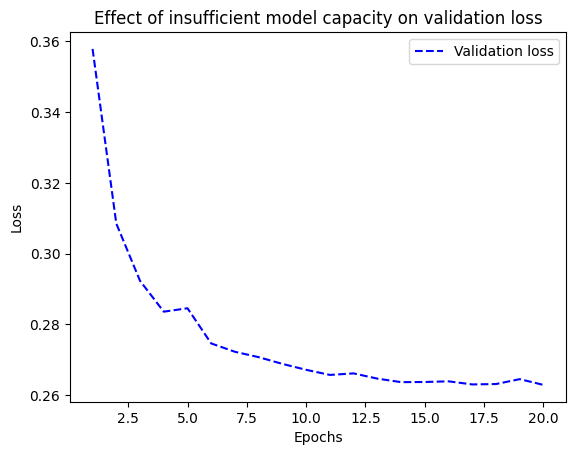

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 해당 코드는 이전 코드에서 학습한 작은 모델의 validation loss 값을 시각화하는 코드입니다.

# val_loss = history_small_model.history["val_loss"]: 작은 모델의 validation loss 값을 history_small_model에서 가져옵니다.
# epochs = range(1, 21): epoch 수를 지정합니다. 해당 모델은 20번의 epoch 동안 학습했으므로, epochs 변수는 1부터 20까지의 값을 가집니다.
# plt.plot(epochs, val_loss, "b--", label="Validation loss"): epoch 별 validation loss 값을 파란 점선 그래프로 시각화합니다. 레이블은 "Validation loss"로 지정됩니다.
# plt.title("Effect of insufficient model capacity on validation loss"): 그래프의 제목을 지정합니다.
# plt.xlabel("Epochs"): x축 레이블을 지정합니다.
# plt.ylabel("Loss"): y축 레이블을 지정합니다.
# plt.legend(): 그래프의 범례를 표시합니다.

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)


# 해당 코드는 96개의 노드로 이루어진 2개의 Dense Layer와 10개의 노드로 이루어진 출력 Layer로 이루어진 더 큰 모델을 생성하고 컴파일하며, 
# 이 모델을 MNIST 데이터셋으로 학습시키는 코드입니다.

# 모델은 RMSprop 옵티마이저를 사용하며, sparse_categorical_crossentropy 손실 함수를 사용합니다. 학습 과정에서 accuracy 메트릭을 사용하여 모델의 정확도를 평가합니다.

# 학습 데이터는 128개의 샘플을 가진 batch를 이용하여 20번의 epoch 동안 학습을 진행합니다. 
# 이때 학습에는 학습 데이터셋의 80%를 사용하고, 검증에는 학습 데이터셋의 20%를 사용합니다.

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3662 - accuracy: 0.8961 - val_loss: 0.1962 - val_accuracy: 0.9408
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1664 - accuracy: 0.9505 - val_loss: 0.1546 - val_accuracy: 0.9540
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1158 - accuracy: 0.9653 - val_loss: 0.1201 - val_accuracy: 0.9654
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0885 - accuracy: 0.9736 - val_loss: 0.1120 - val_accuracy: 0.9674
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0708 - accuracy: 0.9787 - val_loss: 0.0972 - val_accuracy: 0.9723
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0577 - accuracy: 0.9829 - val_loss: 0.1009 - val_accuracy: 0.9707
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0925 - val_accuracy: 0.9735
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

# IMDB 데이터셋을 로드하고 벡터화하는 부분입니다. num_words 인수는 가장 많이 등장하는 단어 중에서 이용할 단어의 개수를 지정하는 것으로, 
# 10000이라는 값을 주어 10000개의 단어만 사용하도록 합니다. vectorize_sequences 함수는 IMDB 데이터셋의 단어들을 이진 벡터로 변환합니다. 
# 먼저 results 변수를 모두 0으로 초기화하고, 각각의 리뷰에서 등장한 단어들에 해당하는 벡터 요소를 1로 설정합니다. 
# 이후 모델 구성 및 학습에 필요한 설정들을 진행합니다. Sequential 모델을 사용하며, 각각의 은닉층은 16개의 유닛을 가지고 있습니다. 
# 출력층은 이진 분류 문제이므로 sigmoid 활성화 함수를 사용하였습니다. 
# rmsprop 옵티마이저를 이용하여 모델을 컴파일하고, fit 메서드를 통해 모델을 학습시킵니다. 
# 훈련 데이터 중 40%를 검증 데이터로 사용하며, 전체 데이터셋에 대해 20번의 에포크 동안 학습을 진행합니다.

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5122 - accuracy: 0.7715 - val_loss: 0.3766 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3041 - accuracy: 0.9001 - val_loss: 0.3296 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2275 - accuracy: 0.9239 - val_loss: 0.3688 - val_accuracy: 0.8459
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1870 - accuracy: 0.9379 - val_loss: 0.2929 - val_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1570 - accuracy: 0.9491 - val_loss: 0.2829 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1297 - accuracy: 0.9595 - val_loss: 0.2902 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1147 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

# 모델 구성에서는 은닉층이 2개이고, 각 은닉층은 4개의 뉴런을 가지고 relu 활성화 함수를 사용합니다. 
# 출력층은 하나의 뉴런을 가지고 sigmoid 활성화 함수를 사용합니다.

# 모델 컴파일 시에는 rmsprop 옵티마이저, binary_crossentropy 손실 함수, accuracy 지표를 사용합니다.

# 모델을 학습시키는데, 20 epoch 동안 512개의 샘플을 사용하여 학습하고, 40%의 검증 데이터를 사용하여 평가합니다. 
# 학습된 결과값은 history_smaller_model에 저장됩니다됩니다.

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6595 - accuracy: 0.5797 - val_loss: 0.6253 - val_accuracy: 0.6606
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5933 - accuracy: 0.7107 - val_loss: 0.5754 - val_accuracy: 0.7149
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.5431 - accuracy: 0.7845 - val_loss: 0.5376 - val_accuracy: 0.7899
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5032 - accuracy: 0.8307 - val_loss: 0.5122 - val_accuracy: 0.7980
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4716 - accuracy: 0.8613 - val_loss: 0.4886 - val_accuracy: 0.8536
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4450 - accuracy: 0.8844 - val_loss: 0.4727 - val_accuracy: 0.8682
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4226 - accuracy: 0.9031 - val_loss: 0.4606 - val_accuracy: 0.8690
Epoch 8/20
30

**Version of the model with higher capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

# IMDB 리뷰 데이터셋을 로드하고, 10,000개의 단어만 사용하도록 지정하여 훈련 데이터와 레이블을 가져옵니다. 
# 이어서 model을 구성합니다. 이 모델은 Sequential 모델로, 2개의 은닉층과 1개의 출력층으로 구성됩니다. 
# 은닉층은 각각 512개의 뉴런과 ReLU 활성화 함수를 사용합니다. 출력층은 1개의 뉴런과 Sigmoid 활성화 함수를 사용합니다.

# model을 컴파일할 때는 "rmsprop" 옵티마이저, "binary_crossentropy" 손실 함수, "accuracy" 지표를 사용합니다.

# model.fit()을 사용하여 모델을 학습시키는데, 20번의 epoch 동안 512개의 샘플을 사용하여 학습하고 40%의 검증 데이터를 사용하여 평가합니다. 
# 결과값은 history_larger_model에 저장됩니다.

Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.5539 - accuracy: 0.7211 - val_loss: 0.5336 - val_accuracy: 0.7230
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3244 - accuracy: 0.8681 - val_loss: 0.2768 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2387 - accuracy: 0.9043 - val_loss: 0.2725 - val_accuracy: 0.8921
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1745 - accuracy: 0.9339 - val_loss: 0.2841 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1306 - accuracy: 0.9506 - val_loss: 0.4420 - val_accuracy: 0.8472
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1180 - accuracy: 0.9573 - val_loss: 0.3339 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0845 - accuracy: 0.9740 - val_loss: 0.3484 - val_accuracy: 0.8836
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

# regularizers 모듈을 이용하여 L2 규제를 추가한 모델을 만듭니다. Sequential 모델에 2개의 은닉층과 1개의 출력층을 추가합니다. 
# 각 은닉층은 16개의 뉴런과 ReLU 활성화 함수를 사용합니다. 그리고 각 은닉층의 가중치에 L2 규제를 적용합니다. 출력층은 1개의 뉴런과 Sigmoid 활성화 함수를 사용합니다.

# model을 컴파일할 때는 "rmsprop" 옵티마이저, "binary_crossentropy" 손실 함수, "accuracy" 지표를 사용합니다.

# model.fit()을 사용하여 모델을 학습시키는데, 20번의 epoch 동안 512개의 샘플을 사용하여 학습하고 40%의 검증 데이터를 사용하여 평가합니다.
# 결과값은 history_l2_reg에 저장됩니다.

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.6205 - accuracy: 0.7729 - val_loss: 0.4856 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4161 - accuracy: 0.8915 - val_loss: 0.3971 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3393 - accuracy: 0.9115 - val_loss: 0.3959 - val_accuracy: 0.8704
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2990 - accuracy: 0.9252 - val_loss: 0.3855 - val_accuracy: 0.8719
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2775 - accuracy: 0.9327 - val_loss: 0.3803 - val_accuracy: 0.8775
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2623 - accuracy: 0.9379 - val_loss: 0.3689 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2515 - accuracy: 0.9414 - val_loss: 0.3625 - val_accuracy: 0.8838
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

# 위 코드는 keras의 regularizers 모듈을 사용하여 L1, L2, L1_L2 규제를 설정하는 예시입니다.

# regularizers.l1(0.001)은 L1 규제를 설정하며, 규제 강도는 0.001로 지정됩니다. L1 규제는 가중치의 절댓값에 비례하는 값으로, 가중치가 0에 가까워지도록 합니다.

# regularizers.l2(0.001)는 L2 규제를 설정하며, 규제 강도는 0.001로 지정됩니다. L2 규제는 가중치의 제곱에 비례하는 값으로, 가중치를 작게 유지하도록 합니다.

# regularizers.l1_l2(l1=0.001, l2=0.001)은 L1_L2 규제를 설정하며, L1 규제와 L2 규제를 함께 사용합니다. l
# 1과 l2 매개변수를 사용하여 규제 강도를 각각 지정할 수 있습니다. L1_L2 규제는 L1 규제와 L2 규제를 합한 값으로 가중치를 작게 유지하고 0에 가까워지도록 합니다.

#### Adding dropout

**Adding dropout to the IMDB model**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

# 위 코드는 드롭아웃을 적용한 모델을 생성하고 컴파일한 후, 학습시키는 코드입니다.

# 모델은 Sequential 모델로 구성되며, 첫번째와 두번째 은닉층은 각각 16개의 뉴런과 ReLU 활성화 함수를 사용합니다. 
# 드롭아웃은 0.5의 비율로 적용됩니다. 출력층은 1개의 뉴런과 Sigmoid 활성화 함수를 사용합니다.

# 모델 컴파일 시에는 "rmsprop" 옵티마이저, "binary_crossentropy" 손실 함수, "accuracy" 지표를 사용합니다.

# model.fit()을 사용하여 모델을 학습시키는데, 20번의 epoch 동안 512개의 샘플을 사용하여 학습하고 40%의 검증 데이터를 사용하여 평가합니다. 
# 결과값은 history_dropout에 저장됩니다.

Epoch 1/20
30/30 [==============================] - 4s 62ms/step - loss: 0.6403 - accuracy: 0.6343 - val_loss: 0.5335 - val_accuracy: 0.8088
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5346 - accuracy: 0.7675 - val_loss: 0.4474 - val_accuracy: 0.8675
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4470 - accuracy: 0.8207 - val_loss: 0.3726 - val_accuracy: 0.8648
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3862 - accuracy: 0.8497 - val_loss: 0.3180 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3341 - accuracy: 0.8739 - val_loss: 0.2871 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2968 - accuracy: 0.8920 - val_loss: 0.2778 - val_accuracy: 0.8905
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2619 - accuracy: 0.9044 - val_loss: 0.2745 - val_accuracy: 0.8910
Epoch 8/20
30

## Summary